<a href="https://colab.research.google.com/github/zevan07/DS-Unit-2-Tree-Ensembles/blob/master/Pump_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

     |████████████████████████████████| 92kB 5.9MB/s 


In [0]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [0]:
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/tanzania/'
train_features = pd.read_csv(WEB + 'train_features.csv')
train_labels = pd.read_csv(WEB + 'train_labels.csv')
test_features = pd.read_csv(WEB + 'test_features.csv')
sample_submission = pd.read_csv(WEB + 'sample_submission.csv')

In [4]:
X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val, = train_test_split(
    X_train, y_train, train_size=.8, test_size=.2,
    stratify=y_train, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [0]:
train = pd.merge(train_features, train_labels)
test = test_features

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                             stratify=train['status_group'], random_state=42)

In [0]:
def wrangle(X):
    X = X.copy()
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    cols_with_zeros = ['construction_year', 'longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col] = X[col].fillna(X[col].mean())
        
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    
    X = X.drop(columns='quantity_group')
    
    categoricals = X.select_dtypes(exclude='number').columns
    for col in categoricals:
        X[col] = X[col].fillna('MISSING')
        
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

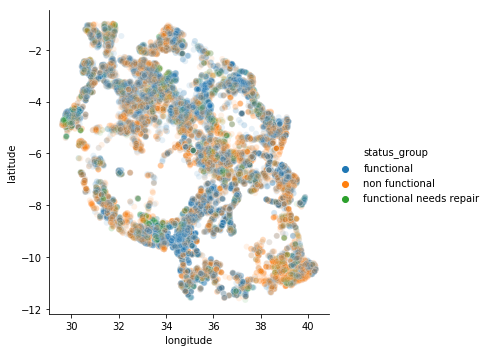

In [7]:
sns.relplot(x='longitude', y='latitude', hue='status_group', 
            data=train, alpha=.1);

In [0]:
target = 'status_group'

train_features = train.drop(columns=[target, 'id'])

numeric_features = train_features.select_dtypes(include='number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 10000].index.tolist()
high_card = cardinality[cardinality > 50].index.tolist()

features0 = numeric_features + categorical_features

In [0]:
features = features0[:]

In [0]:
model = RandomForestClassifier()

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Encoder: fit_transform on train, transform on val & test
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

# Scaler: fit_transform on train, transform on val & test
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Model: Fit on train, score on val, predict on test
# model = LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=-1)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))
y_pred = model.predict(X_test_scaled)

TypeError: ignored

In [0]:
# high cardinality but apparently useful features
high_card = ['installer', 'funder', 'extraction_type_class']

In [0]:
features = features0[:] + high_card

In [0]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

print('Validation_Accuracy', model.score(X_val_scaled, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation_Accuracy 0.7962121212121213


In [0]:
features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'year_recorded',
 'month_recorded',
 'basin',
 'region',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'installer',
 'funder',
 'extraction_type_class']

In [0]:
high_card

<bound method IndexOpsMixin.tolist of Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'lga',
       'ward', 'scheme_name'],
      dtype='object')>

In [0]:
features1 = ['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'year_recorded',
 'month_recorded',
 'date_recorded',
 'funder',
 'installer',
 'basin',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [0]:
high_card.dtype

AttributeError: ignored

In [0]:
low_card = list(set(features1) - set(high_card))

In [0]:
'date_recorded' in low_card

False

In [0]:
features = low_card[:]

In [0]:
best_accuracy = .63

In [0]:
features

['latitude',
 'quality_group',
 'amount_tsh',
 'extraction_type_group',
 'extraction_type_class',
 'payment',
 'num_private',
 'month_recorded',
 'quantity',
 'payment_type',
 'waterpoint_type',
 'waterpoint_type_group',
 'gps_height',
 'scheme_management',
 'region',
 'public_meeting',
 'region_code',
 'extraction_type',
 'management',
 'water_quality',
 'source_type',
 'district_code',
 'longitude',
 'management_group',
 'source',
 'source_class',
 'permit',
 'basin',
 'year_recorded',
 'construction_year',
 'population',
 'recorded_by']

In [0]:
high_card.remove('subvillage')
high_card.remove('wpt_name')
high_card.remove('date_recorded')

In [0]:
high_card.remove('ward')
high_card.remove('lga')

In [0]:
high_card

['funder', 'installer', 'scheme_name']

In [0]:
train[high_card]

,funder,installer,lga,ward,scheme_name
43360,MISSING,MISSING,Rungwe,Kiwira,K
7263,Rc Church,ACRA,Njombe,Imalinyi,Tove Mtwango gravity Scheme
2486,Donor,Do,Bagamoyo,Mbwewe,MISSING
313,Government Of Tanzania,DWE,Karagwe,Isingiro,MISSING
52726,Water,Gove,Bahi,Nondwa,Zeje
8558,Dwe/norad,DWE,Sumbawanga Rural,Kasanga,Kisumba water supply
2559,Oxfam,DWE,Arusha Rural,Oltroto,Nabaiye pipe line
54735,Water,DWE,Kondoa,Mrijo,Mrij
25763,Danida,DANIDA,Mbozi,Halungu,MISSING
44540,Tancan,TANCAN,Missungwi,Shilalo,MISSING


In [0]:
for item in high_card:
    feature_save = features[:]
    if item not in features:
        features.append(item)
        
        X_train = train[features]
        y_train = train[target]
        X_val = val[features]
        y_val = val[target]
        X_test = test[features]

        encoder = ce.OneHotEncoder(use_cat_names=True)
        X_train_encoded = encoder.fit_transform(X_train)
        X_val_encoded = encoder.transform(X_val)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_encoded)
        X_val_scaled = scaler.transform(X_val_encoded)

        model = RandomForestClassifier()
        model.fit(X_train_scaled, y_train)

        accuracy = model.score(X_val_scaled, y_val)
        if (accuracy > best_accuracy) and (item in features):
            best_accuracy = model.score(X_val_scaled, y_val)
    #         break
        else:
            features = feature_save[:]

print('Validation_Accuracy', model.score(X_val_scaled, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation_Accuracy 0.7962962962962963


In [0]:
best_accuracy

0.7976430976430976

In [0]:
for item in features:
    feature_save = features[:]
    features.remove(item)
    
    X_train = train[features]
    y_train = train[target]
    X_val = val[features]
    y_val = val[target]
    X_test = test[features]

    encoder = ce.OneHotEncoder(use_cat_names=True)
    X_train_encoded = encoder.fit_transform(X_train)
    X_val_encoded = encoder.transform(X_val)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_val_scaled = scaler.transform(X_val_encoded)

    model = RandomForestClassifier()
    model.fit(X_train_scaled, y_train)
    
    accuracy = model.score(X_val_scaled, y_val)
    if (accuracy > best_accuracy):
        best_accuracy = model.score(X_val_scaled, y_val)
#         break
    else:
        features = feature_save[:]

print('Validation_Accuracy', model.score(X_val_scaled, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Validation_Accuracy 0.7962962962962963


In [0]:
for item in features:
    feature_save = features[:]
    features.remove(item)
    features.append(item)
    
    X_train = train[:]
    X_val = val[:]
    
    X_train_subset = X_train[features]
    X_val_subset = X_val[features]

    encoder = ce.OneHotEncoder(use_cat_names=True)
    X_train_encoded = encoder.fit_transform(X_train_subset)
    X_val_encoded = encoder.transform(X_val_subset)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_val_scaled = scaler.transform(X_val_encoded)

    model = RandomForestClassifier()
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_val_scaled, y_val)
    if (accuracy > best_accuracy) and (item in features):
        best_accuracy = model.score(X_val_scaled, y_val)
#         break
    else:
        features = feature_save[:]

print('Validation_Accuracy', model.score(X_val_scaled, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Validation_Accuracy 0.7921717171717172


In [0]:
best_accuracy

0.7976430976430976

In [0]:
feature_newbest = features[:]
feature_newbest

['region',
 'water_quality',
 'extraction_type_group',
 'source',
 'extraction_type_class',
 'payment',
 'public_meeting',
 'source_type',
 'quantity',
 'management_group',
 'payment_type',
 'quantity_group',
 'quality_group',
 'recorded_by',
 'permit',
 'extraction_type',
 'waterpoint_type_group',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'waterpoint_type',
 'management',
 'scheme_management']

In [0]:
new_features = features[:]

X_train_subset = X_train[new_features]
X_val_subset = X_val[new_features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

print('Validation_Accuracy', model.score(X_val_scaled, y_val))

TypeError: ignored

In [0]:
PR_acc = 0.7974747474747474

In [0]:
features = new_features[:]

In [0]:
test_features[features].shape

(14358, 32)

In [0]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)
all(X_test_encoded.columns == X_train_encoded.columns)

NameError: ignored

In [0]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-04.csv', index=False)